In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [8]:
#read the file
df = pd.read_csv(r'C://Users//kaila//OneDrive//Desktop//ML In Finance//AAPL.csv')
df_ff = pd.read_csv(r'C://Users//kaila//OneDrive//Desktop//ML In Finance//dataset//F-F_Research_Data_Factors_daily.csv')

#print the head
df.head()

,Date,Open,Close,High,Low,Volume
0,4-Jan-16,102.610001,105.349998,105.370003,102.000000,67649400
1,5-Jan-16,105.750000,102.709999,105.849998,102.410004,55791000
2,6-Jan-16,100.559998,100.699997,102.370003,99.870003,68457400
3,7-Jan-16,98.680000,96.449997,100.129997,96.430000,81094400
4,8-Jan-16,98.550003,96.959999,99.110001,96.760002,70798000


In [10]:
df_ff.tail()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
24554,20190826,1.08,-0.02,-0.21,0.007
24555,20190827,-0.46,-0.87,-0.68,0.007
24556,20190828,0.68,0.47,0.62,0.007
24557,20190829,1.35,0.31,0.34,0.007
24558,20190830,0.03,-0.38,0.26,0.007


In [12]:
df_ff = df_ff.rename(columns={'Unnamed: 0': "Date"})
df_ff['Date'] = pd.to_datetime(df_ff.Date)
df_ff.head()

,Date,Mkt-RF,SMB,HML,RF
0,1970-01-01 00:00:00.019260701,0.10,-0.24,-0.28,0.009
1,1970-01-01 00:00:00.019260702,0.45,-0.32,-0.08,0.009
2,1970-01-01 00:00:00.019260706,0.17,0.27,-0.35,0.009
3,1970-01-01 00:00:00.019260707,0.09,-0.59,0.03,0.009
4,1970-01-01 00:00:00.019260708,0.21,-0.36,0.15,0.009


In [13]:
print('Apple info: ',df.info())
print('FF info: ',df_ff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 6 columns):
Date      878 non-null object
Open      878 non-null float64
Close     878 non-null float64
High      878 non-null float64
Low       878 non-null float64
Volume    878 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 41.3+ KB
Apple info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24559 entries, 0 to 24558
Data columns (total 5 columns):
Date      24559 non-null datetime64[ns]
Mkt-RF    24559 non-null float64
SMB       24559 non-null float64
HML       24559 non-null float64
RF        24559 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 959.5 KB
FF info:  None


### The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

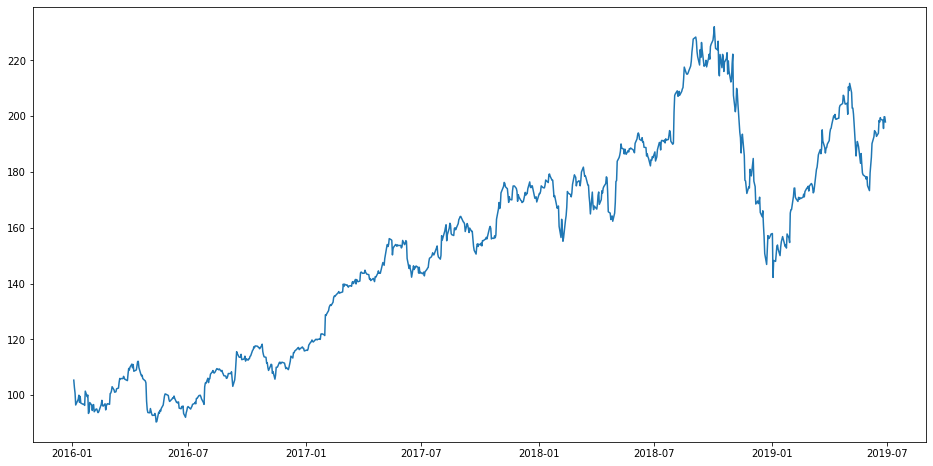

In [14]:

#setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

### Calculate the Moving Average:

- The predicted closing price for each day will be the average of a set of previously observed values.
- Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction.
- Simply, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 878 entries, 2016-01-04 to 2019-06-28
Data columns (total 6 columns):
Date      878 non-null datetime64[ns]
Open      878 non-null float64
Close     878 non-null float64
High      878 non-null float64
Low       878 non-null float64
Volume    878 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 48.0 KB


In [16]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)

# Create empty dataframe skeleton
df2 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


for i in range(0,len(data)):
     df2['Date'][i] = data['Date'][i]
     df2['Close'][i] = data['Close'][i]

In [17]:
df2

,Date,Close
0,2016-01-04 00:00:00,105.35
1,2016-01-05 00:00:00,102.71
2,2016-01-06 00:00:00,100.7
3,2016-01-07 00:00:00,96.45
4,2016-01-08 00:00:00,96.96
...,...,...
873,2019-06-24 00:00:00,198.58
874,2019-06-25 00:00:00,195.57
875,2019-06-26 00:00:00,199.8
876,2019-06-27 00:00:00,199.74


In [18]:
# splitting into train and validation
train = df2[:600]
valid = df2[600:]
print("------------------------Train------------------------")
print(train)
print("Shape: ", train.shape)
print("------------------------Test------------------------")
print(valid)
print("Shape: ", valid.shape)

------------------------Train------------------------
                    Date   Close
0    2016-01-04 00:00:00  105.35
1    2016-01-05 00:00:00  102.71
2    2016-01-06 00:00:00   100.7
3    2016-01-07 00:00:00   96.45
4    2016-01-08 00:00:00   96.96
..                   ...     ...
595  2018-05-15 00:00:00  186.44
596  2018-05-16 00:00:00  188.18
597  2018-05-17 00:00:00  186.99
598  2018-05-18 00:00:00  186.31
599  2018-05-21 00:00:00  187.63

[600 rows x 2 columns]
Shape:  (600, 2)
------------------------Test------------------------
                    Date   Close
600  2018-05-22 00:00:00  187.16
601  2018-05-23 00:00:00  188.36
602  2018-05-24 00:00:00  188.15
603  2018-05-25 00:00:00  188.58
604  2018-05-29 00:00:00   187.9
..                   ...     ...
873  2019-06-24 00:00:00  198.58
874  2019-06-25 00:00:00  195.57
875  2019-06-26 00:00:00   199.8
876  2019-06-27 00:00:00  199.74
877  2019-06-28 00:00:00  197.92

[278 rows x 2 columns]
Shape:  (278, 2)


In [19]:
valid.shape[0]

278

In [20]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(round(rms,2))


RMSE value on validation set:
29.72


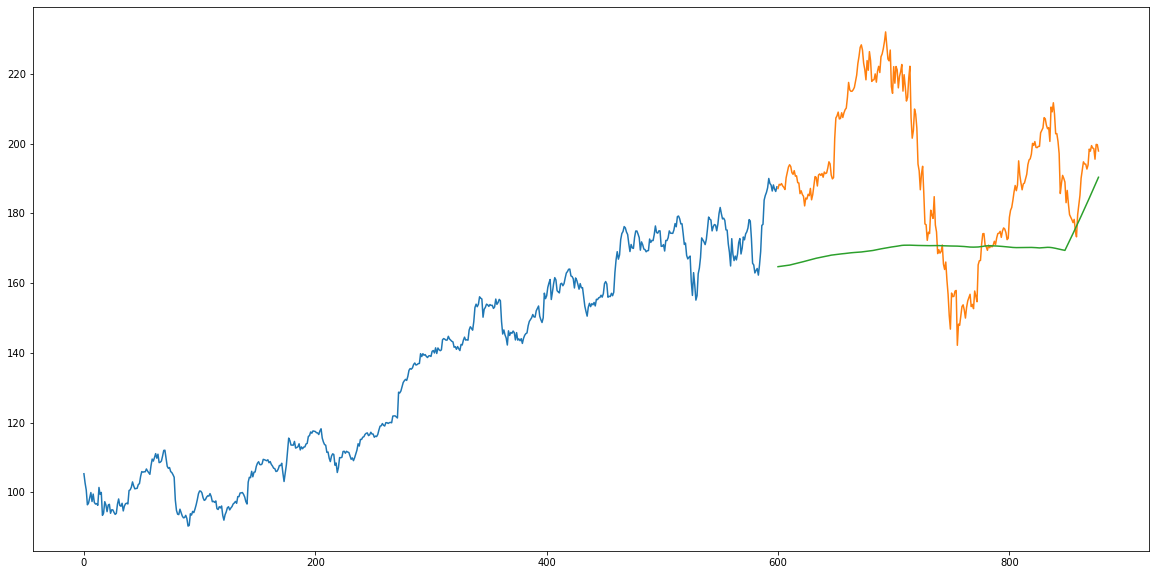

In [21]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

## Linear Regression
The equation for linear regression can be written as: 
![image.png](attachment:image.png)

Again We will create saperate data so that any chnges we made wont affect the original dataset


In [22]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
# df.index = df['Date']

#sorting
df3 = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
# df3 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
# df3 = pd.DataFrame(index=range(0,len(df)))

# for i in range(0,len(data)):
#     df3['Date'][i] = data1['Date'][i]
#     df3['Close'][i] = data1['Close'][i]
print(df3.head())

                 Date        Open       Close        High         Low  \
Date                                                                    
2016-01-04 2016-01-04  102.610001  105.349998  105.370003  102.000000   
2016-01-05 2016-01-05  105.750000  102.709999  105.849998  102.410004   
2016-01-06 2016-01-06  100.559998  100.699997  102.370003   99.870003   
2016-01-07 2016-01-07   98.680000   96.449997  100.129997   96.430000   
2016-01-08 2016-01-08   98.550003   96.959999   99.110001   96.760002   

              Volume  
Date                  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
2016-01-08  70798000  


### Create ‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’

In [23]:
# from fastai.structured import  add_datepart
# # from structured import *

# add_datepart(new_data, 'Date')
# new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

# df3['mon_fri'] = 0
# df3['Dayofweek']=0

# Create 3 new columns

df3[['year','month','day']] = df3.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [24]:
df3=df3.drop('Date', axis=1)
df3=df3.drop('Volume', axis=1)

df3

,Open,Close,High,Low,year,month,day
Date,,,,,,,
2016-01-04,102.610001,105.349998,105.370003,102.000000,2016,01,04
2016-01-05,105.750000,102.709999,105.849998,102.410004,2016,01,05
2016-01-06,100.559998,100.699997,102.370003,99.870003,2016,01,06
2016-01-07,98.680000,96.449997,100.129997,96.430000,2016,01,07
2016-01-08,98.550003,96.959999,99.110001,96.760002,2016,01,08
...,...,...,...,...,...,...,...
2019-06-24,198.539993,198.580002,200.160004,198.169998,2019,06,24
2019-06-25,198.429993,195.570007,199.259995,195.289993,2019,06,25
2019-06-26,197.770004,199.800003,200.990005,197.350006,2019,06,26


In [25]:
#split into train and validation
train = df3[:600]
valid = df3[600:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']
# print(x_train,y_train,x_valid,y_valid)
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1.1465075334809065

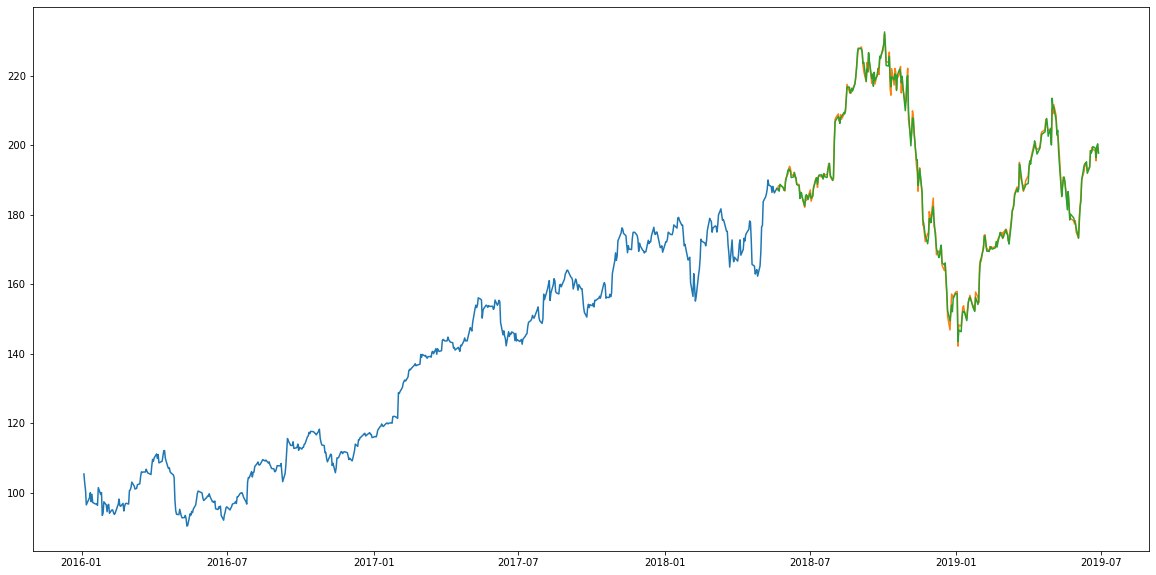

In [27]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = df3[600:].index
train.index = df3[:600].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


## k-Nearest Neighbours Regressor


In [28]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [29]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [30]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

46.045016154706026

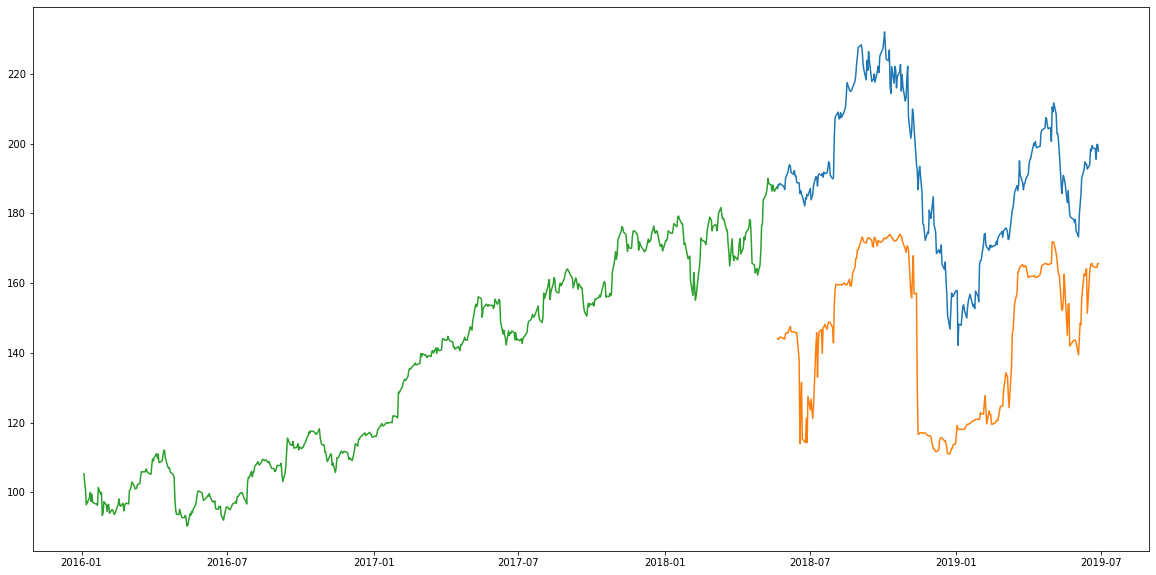

In [31]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

## Auto ARIMA